In [1]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
from numpy import percentile
import math
import os
from sklearn.model_selection import train_test_split

In [3]:
# Data Visualization Libraries :
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Libraries to convert .las files to .csv and merge

import lasio
import glob  ##For merging csv files

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

In [6]:
#Feature Selection Libraries
from sklearn.feature_selection import VarianceThreshold

In [7]:
#SCALING LIBRARIES
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler

In [8]:
#MODEL TRAINING LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor

In [9]:
#MODEL ACCURACY LIBRARIES
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [10]:
path='/media/mr-robot/Local Disk/summer_training/Train'
os.chdir(path)


In [11]:
df = pd.read_csv('merged_data.csv')
df

,DEPTH,ACOUSTICIMPEDANCE1,AI,AVG_PIGN,CALI,CALI[DERIVED]1,DFL,DT,FACIES,FLD1,...,CALI_1,NPHI_1,ZCOR,RHOB_1,RXO,SPDH,DTDS,M2R1,TH,U
0,1295.9144,4834.3213,4834321.0,NaN,9.1419,9.1419,1.0697,137.8066,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1296.0668,4751.9272,4751927.0,NaN,9.2247,9.2247,1.2028,139.5873,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1296.2192,4777.4341,4777434.5,NaN,9.2680,9.2680,1.2145,140.0185,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1296.3716,4810.3301,4810330.0,NaN,9.2766,9.2766,1.0487,139.3474,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1296.5240,4827.2563,4827256.5,NaN,9.2866,9.2866,0.9479,138.8638,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58494,1622.6028,6069.1309,6069130.5,NaN,8.5257,NaN,NaN,123.7404,NaN,NaN,...,NaN,0.4993,NaN,2.4639,NaN,NaN,123.7404,1.5970,NaN,NaN
58495,1622.7552,6067.8120,6067812.0,NaN,8.5282,NaN,NaN,123.8728,NaN,NaN,...,NaN,0.5313,NaN,2.4660,NaN,NaN,123.8728,1.6128,NaN,NaN
58496,1622.9076,6105.7729,6105773.0,NaN,8.5313,NaN,NaN,123.3722,NaN,NaN,...,NaN,0.5448,NaN,2.4714,NaN,NaN,123.3722,1.7043,NaN,NaN
58497,1623.0600,6152.9897,6152977.5,NaN,8.5331,NaN,NaN,122.6038,NaN,NaN,...,NaN,0.5364,NaN,2.4750,NaN,NaN,122.6038,1.8375,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58499 entries, 0 to 58498
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DEPTH               58499 non-null  float64
 1   ACOUSTICIMPEDANCE1  58499 non-null  float64
 2   AI                  55259 non-null  float64
 3   AVG_PIGN            323 non-null    float64
 4   CALI                54981 non-null  float64
 5   CALI[DERIVED]1      44090 non-null  float64
 6   DFL                 23458 non-null  float64
 7   DT                  58499 non-null  float64
 8   FACIES              52641 non-null  float64
 9   FLD1                3963 non-null   float64
 10  GR                  58379 non-null  float64
 11  HDRS                26951 non-null  float64
 12  HMRS                26951 non-null  float64
 13  DEPTH_1             50885 non-null  float64
 14  NPHI                58172 non-null  float64
 15  ONE-WAYTIME1        15713 non-null  float64
 16  PERF

In [13]:
#Selecting required feature
df=df[["GR","RHOB","NPHI","DT"]]

In [14]:
df.isnull().sum()

GR      120
RHOB      0
NPHI    327
DT        0
dtype: int64

In [15]:
df= df.dropna(axis=0)

In [16]:
df

,GR,RHOB,NPHI,DT
0,61.3278,2.1857,0.5643,137.8066
1,61.9954,2.1762,0.5611,139.5873
2,63.5188,2.1946,0.5630,140.0185
3,64.9925,2.1992,0.5677,139.3474
4,65.6985,2.1992,0.5743,138.8638
...,...,...,...,...
58461,82.2480,2.6072,0.5111,110.8313
58462,81.6189,2.5490,0.5079,110.6059
58463,82.5907,2.4944,0.4909,113.7010
58464,83.2526,2.4870,0.4823,116.2950


In [17]:
x = df.drop("DT",1)
y = df["DT"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4) 

In [18]:
X_train.shape

(46477, 3)

In [19]:
def outliers(dataConditioningStrategy,dataframe, y_dataframe, dataconditioningcolumns):
    df=dataframe
    df["y"]=y_dataframe
    if dataConditioningStrategy == "3_Standard_Deviation":
        for column in dataconditioningcolumns:
            print("column",column )
            upperlimit = df[column].mean() + 3*df[column].std()
            lowerlimit = df[column].mean() - 3*df[column].std()

            print("3 standard deviation outliers -:")
            print(df[(df[column] > upperlimit) | (df[column] < lowerlimit)])
            print(df[(df[column] > upperlimit) | (df[column] < lowerlimit)].shape)
            df= df[(df[column] < upperlimit) & (df[column] > lowerlimit)]
            print(df)

    elif dataConditioningStrategy == "4_Standard_Deviation":
        for column in dataconditioningcolumns:
            print("column",column )
            upperlimit = df[column].mean() + 4*df[column].std()
            lowerlimit = df[column].mean() - 4*df[column].std()

            print("4 standard deviation outliers -:")
            print(df[(df[column] > upperlimit) | (df[column] < lowerlimit)])
            print(df[(df[column] > upperlimit) | (df[column] < lowerlimit)].shape)
            df= df[(df[column] < upperlimit) & (df[column] > lowerlimit)]
            print(df)
            
    elif dataConditioningStrategy == "InterquartileRange":
        for column in dataconditioningcolumns:
            print("column",column )
            q25, q75 = percentile(df[column], 25), percentile(df[column], 75)
            iqr = q75 - q25
            print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
            cut_off = iqr * 1.5
            lowerlimit, upperlimit = q25 - cut_off, q75 + cut_off

            print("InterQuartile Range Outliers-:")
            print(df[(df[column] > upperlimit) | (df[column] < lowerlimit)])
            print(df[(df[column] > upperlimit) | (df[column] < lowerlimit)].shape)
            df= df[(df[column] < upperlimit) & (df[column] > lowerlimit)]
            print(df)

            
    return df.drop("y",axis=1) , df["y"]


In [20]:
DATAConditioningStrategy = ["3_Standard_Deviation","4_Standard_Deviation","InterquartileRange"]
DATAConditioningColumns = ["GR","RHOB","NPHI"]
optionoutlier = 0
X_train,y_train = outliers(DATAConditioningStrategy[optionoutlier] , X_train , y_train, DATAConditioningColumns)

column GR
3 standard deviation outliers -:
             GR    RHOB    NPHI         y
38872  177.2283  2.6526  0.5631  159.2438
37912  187.7777  2.4635  0.5864  128.4088
39003  185.1136  2.4443  0.6586  147.0338
37685  166.0200  2.3162  0.6634  131.6756
39289  167.0888  1.8879  0.8120  143.4888
...         ...     ...     ...       ...
37868  171.6167  2.4143  0.5227  103.8630
39152  177.3839  1.9921  0.7775  145.7015
37412  169.6837  2.4180  0.6515  156.8676
39209  177.0399  2.0120  0.7306  132.1170
38963  193.1186  2.5238  0.6102  109.3014

[1149 rows x 4 columns]
(1149, 4)
             GR    RHOB    NPHI         y
7174    54.9827  2.4818  0.5497  100.8784
34641   95.0442  2.5565  0.5258  101.1751
48215   69.2090  2.3328  0.5124  106.7575
18175   67.8533  2.4396  0.6228  119.8530
50056   88.0100  2.4424  0.4396  114.9634
...         ...     ...     ...       ...
55488  103.1246  2.5150  0.4686   98.6188
50169   84.2108  2.3961  0.4774  108.7165
27063   58.8217  2.4845  0.5033  103.953

In [21]:
X_train

,GR,RHOB,NPHI
7174,54.9827,2.4818,0.5497
34641,95.0442,2.5565,0.5258
48215,69.2090,2.3328,0.5124
18175,67.8533,2.4396,0.6228
50056,88.0100,2.4424,0.4396
...,...,...,...
55488,103.1246,2.5150,0.4686
50169,84.2108,2.3961,0.4774
27063,58.8217,2.4845,0.5033
8366,69.2729,2.0863,0.6274


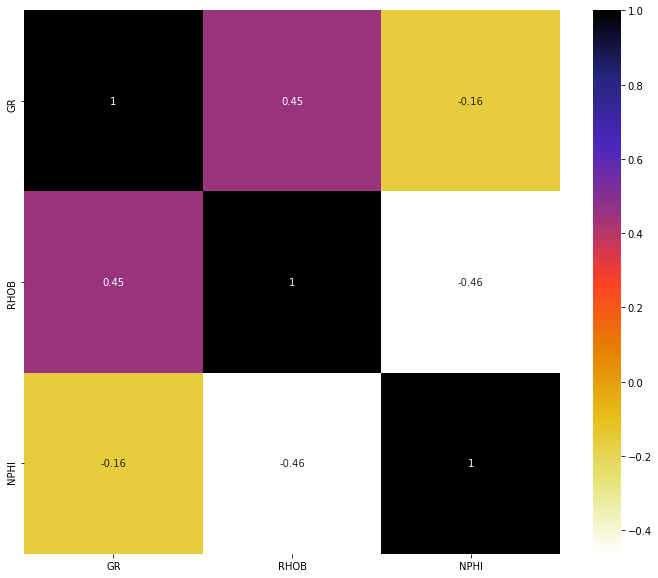

In [22]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor , annot=True , cmap=plt.cm.CMRmap_r)
plt.show()

In [23]:
X_train.var()

GR      621.097210
RHOB      0.093920
NPHI      0.009019
dtype: float64

In [24]:
X_train.corr()

,GR,RHOB,NPHI
GR,1.000000,0.447292,-0.157540
RHOB,0.447292,1.000000,-0.463009
NPHI,-0.157540,-0.463009,1.000000


In [25]:
X_train['NPHI2'] = 2 * X_train.NPHI
X_train.drop('NPHI',1)

,GR,RHOB,NPHI2
7174,54.9827,2.4818,1.0994
34641,95.0442,2.5565,1.0516
48215,69.2090,2.3328,1.0248
18175,67.8533,2.4396,1.2456
50056,88.0100,2.4424,0.8792
...,...,...,...
55488,103.1246,2.5150,0.9372
50169,84.2108,2.3961,0.9548
27063,58.8217,2.4845,1.0066
8366,69.2729,2.0863,1.2548


In [26]:
X_train

,GR,RHOB,NPHI,NPHI2
7174,54.9827,2.4818,0.5497,1.0994
34641,95.0442,2.5565,0.5258,1.0516
48215,69.2090,2.3328,0.5124,1.0248
18175,67.8533,2.4396,0.6228,1.2456
50056,88.0100,2.4424,0.4396,0.8792
...,...,...,...,...
55488,103.1246,2.5150,0.4686,0.9372
50169,84.2108,2.3961,0.4774,0.9548
27063,58.8217,2.4845,0.5033,1.0066
8366,69.2729,2.0863,0.6274,1.2548


def data_scaling( scaling_strategy , scaling_data , scaling_columns ):

    if scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])

    elif scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])

    elif scaling_strategy == "StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])

    else : # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])

    return scaling_data

scaling_strategy = ["RobustScaler","MinMaxScaler","StandardScaler"]
optionscaling = 0
X_train = data_scaling( scaling_strategy[optionscaling] , X_train , X_train.columns )

In [27]:
X_train

,GR,RHOB,NPHI,NPHI2
7174,54.9827,2.4818,0.5497,1.0994
34641,95.0442,2.5565,0.5258,1.0516
48215,69.2090,2.3328,0.5124,1.0248
18175,67.8533,2.4396,0.6228,1.2456
50056,88.0100,2.4424,0.4396,0.8792
...,...,...,...,...
55488,103.1246,2.5150,0.4686,0.9372
50169,84.2108,2.3961,0.4774,0.9548
27063,58.8217,2.4845,0.5033,1.0066
8366,69.2729,2.0863,0.6274,1.2548


In [28]:
X_train.corr()

,GR,RHOB,NPHI,NPHI2
GR,1.000000,0.447292,-0.157540,-0.157540
RHOB,0.447292,1.000000,-0.463009,-0.463009
NPHI,-0.157540,-0.463009,1.000000,1.000000
NPHI2,-0.157540,-0.463009,1.000000,1.000000


In [29]:
X_test,y_test= outliers(DATAConditioningStrategy[optionoutlier] , X_test , y_test, DATAConditioningColumns)

column GR
3 standard deviation outliers -:
             GR    RHOB    NPHI         y
37849  175.6751  2.4016  0.5775  142.2255
37536  168.3488  2.2749  0.7082  132.1620
39217  184.6027  2.4462  0.5585  120.8720
38482  169.4325  2.3972  0.5975  122.9748
38892  210.6389  2.4015  0.6152  146.8278
...         ...     ...     ...       ...
38529  174.2404  2.6524  0.5968  131.5116
38438  175.3356  2.5883  0.5503  123.4890
38209  167.6908  2.2047  0.5728  119.7681
38614  215.1731  2.4510  0.5954  130.6578
37673  169.2242  2.3503  0.6405  126.5171

[268 rows x 4 columns]
(268, 4)
             GR    RHOB    NPHI         y
9485    81.7370  2.3038  0.6009  131.3419
17537   69.1520  2.2208  0.3879  111.5650
51851   96.9270  2.3463  0.3173  129.8816
51900   89.3109  2.4608  0.3544  109.1182
18016   59.3945  2.4996  0.5110  116.1016
...         ...     ...     ...       ...
36698  146.2150  2.1922  0.7058  143.0331
23619   78.3988  2.4924  0.5179  124.7717
22116   69.6871  2.4871  0.4940  122.9038


X_test = data_scaling( scaling_strategy[optionscaling] , X_test , X_test.columns )

In [30]:
X_test['NPHI2'] = 2 * X_test.NPHI
X_test.drop('NPHI',1)

,GR,RHOB,NPHI2
9485,81.7370,2.3038,1.2018
17537,69.1520,2.2208,0.7758
51851,96.9270,2.3463,0.6346
51900,89.3109,2.4608,0.7088
18016,59.3945,2.4996,1.0220
...,...,...,...
36698,146.2150,2.1922,1.4116
23619,78.3988,2.4924,1.0358
22116,69.6871,2.4871,0.9880
53717,84.2177,2.2280,1.0906


In [31]:
cat = CatBoostRegressor(learning_rate=0.135, loss_function='RMSE', depth =11,iterations= 865)

In [32]:
cat.fit(X_train,y_train)

0:	learn: 24.4475256	total: 84.7ms	remaining: 1m 13s
1:	learn: 23.0981182	total: 99.2ms	remaining: 42.8s
2:	learn: 22.0267720	total: 113ms	remaining: 32.4s
3:	learn: 21.1593409	total: 128ms	remaining: 27.5s
4:	learn: 20.4488705	total: 142ms	remaining: 24.4s
5:	learn: 19.8582392	total: 156ms	remaining: 22.3s
6:	learn: 19.4140258	total: 170ms	remaining: 20.9s
7:	learn: 19.0532432	total: 185ms	remaining: 19.8s
8:	learn: 18.6950400	total: 199ms	remaining: 18.9s
9:	learn: 18.4174695	total: 213ms	remaining: 18.2s
10:	learn: 18.2064611	total: 230ms	remaining: 17.8s
11:	learn: 17.9988391	total: 244ms	remaining: 17.3s
12:	learn: 17.8244815	total: 260ms	remaining: 17.1s
13:	learn: 17.6841326	total: 276ms	remaining: 16.7s
14:	learn: 17.5618302	total: 291ms	remaining: 16.5s
15:	learn: 17.4081265	total: 306ms	remaining: 16.2s
16:	learn: 17.2351330	total: 322ms	remaining: 16.1s
17:	learn: 17.1623666	total: 341ms	remaining: 16s
18:	learn: 17.1014328	total: 360ms	remaining: 16s
19:	learn: 17.0558727	t

In [33]:
y_pred = cat.predict(X_test)

In [34]:
r2_score(y_test,y_pred)

0.6080833620744683